# ROOM DETECTION SYSTEM

1.WORKING ON TRAINING DATA

In [1]:
import cv2
print(cv2.__version__)
import numpy as np
import pandas as pd

import numpy as np
import os

import sys
import tensorflow as tf


import matplotlib.pyplot as plt
%matplotlib inline


# To work on the directory
import os
from random import shuffle
from tqdm import tqdm

# For garbage collection
import gc


4.1.0


In [2]:
# Loading training images

train_data = 'C:/Users/soumya/Python_Workspace/DEEP_LEARNING/RoomDetectCond/RoomImages/TrainingImages'


# Declaring image dimensions for colour images
nrows = 150
ncolumns = 150
channels = 3

def one_hot_label(img):
    label = img.split('.')[0]
    if label == 'label1':
        ohl = np.array([0,0,1])
    elif label == 'label2':
        ohl = np.array([0,1,0])
    elif label == 'label3':
        ohl = np.array([1,0,0])
    return ohl


# Steps to read and resize our images to ana acceptable format to train our model
X = []


for i in tqdm(os.listdir(train_data)):
        path = os.path.join(train_data,i)
        #reading the image
        image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (nrows,ncolumns))
        
        X.append([np.array(image), one_hot_label(i)])
        shuffle(X)




100%|██████████| 90/90 [00:01<00:00, 61.01it/s]


In [3]:
X

[[array([[ 7,  8,  8, ...,  2,  3,  3],
         [ 7, 11, 10, ...,  2,  3,  5],
         [ 9,  8,  8, ...,  2,  3,  3],
         ...,
         [ 1,  1,  1, ...,  2,  2,  1],
         [ 1,  1,  0, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2]], dtype=uint8), array([1, 0, 0])],
 [array([[233, 234, 239, ..., 125, 122, 119],
         [231, 233, 238, ..., 125, 123, 121],
         [231, 233, 237, ..., 126, 123, 121],
         ...,
         [ 15,  14,  12, ...,  22,  22,  20],
         [ 16,  12,  13, ...,  23,  22,  24],
         [ 16,  14,  27, ...,  38,  29,  30]], dtype=uint8), array([0, 0, 1])],
 [array([[ 85,  84,  88, ..., 115, 116, 113],
         [ 80,  79,  78, ..., 132, 131, 126],
         [ 84,  82,  83, ..., 135, 133, 129],
         ...,
         [ 37,  32,  13, ...,   8,  19,  13],
         [ 39,  24,  11, ...,   9,  11,  11],
         [ 29,  30,  18, ...,  10,  11,  14]], dtype=uint8), array([0, 0, 1])],
 [array([[161, 160, 160, ..., 168, 218, 216],
         [163, 163

In [4]:
# Splitting the data into train and split data
from sklearn.model_selection import train_test_split

img_data = np.array([i[0] for i in X]).reshape(-1,150,150,1)
lbl_data = np.array([i[1] for i in X])
X_train,X_val,y_train,y_val = train_test_split(img_data,lbl_data, test_size = 0.10, random_state = 3)

print('Shape of training images are ', X_train.shape)
print('Shape of validation images are ', X_val.shape)
print('Shape of labels for training are ', y_train.shape)
print('Shape of labels for validation are ', y_val.shape)





Shape of training images are  (81, 150, 150, 1)
Shape of validation images are  (9, 150, 150, 1)
Shape of labels for training are  (81, 3)
Shape of labels for validation are  (9, 3)


In [5]:

print('Shape of train images is:',X_train.shape)
print('Shape of a train label is:',y_train.shape)

print('Shape of test images is:',X_val.shape)
print('Shape of a test label is:',y_val.shape)

Shape of train images is: (81, 150, 150, 1)
Shape of a train label is: (81, 3)
Shape of test images is: (9, 150, 150, 1)
Shape of a test label is: (9, 3)


In [6]:

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img



Using TensorFlow backend.


In [7]:
'''model = Sequential()

model.add(InputLayer(input_shape = [150,150,1]))
model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'same', activation = 'relu' ))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = (3,3),strides = 1, padding = 'same' , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = (3,3),strides = 1, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = (3,3), strides = 1, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))
'''


model = Sequential()

model.add(InputLayer(input_shape = [150,150,1]))
model.add(Conv2D(filters = 32,kernel_size = 5, strides = 1, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = 5, padding = 'same'))

model.add(Conv2D(filters = 50,kernel_size = 5, strides = 1, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = 5, padding = 'same'))

model.add(Conv2D(filters = 80,kernel_size = 5, strides = 1, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = 5, padding = 'same'))

model.add(Dropout(0,25))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(3,activation = 'softmax'))


In [8]:
# RMSprop optimizer is used with a learning rate of 0.0001
model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(lr= 1e-4), metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 50)        40050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 50)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 80)          100080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 80)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 80)          0         
__________

In [9]:
# Since we are using a small dataset , we need to create an augmentation to prevent overfitting problem
#Lets create the augmentation configuration
#This helps prevent overfitting, since we are using a small dataset
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [10]:


#Create the image generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=64)
val_generator = val_datagen.flow(X_val, y_val, batch_size=64)



In [11]:
ntrain = len(X_train)
nval = len(X_val)
#The training part
#We train for 64 epochs with about 100 steps per epoch
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain ,
                              epochs=10,
                              validation_data=val_generator,
                              validation_steps=nval )

Epoch 1/10
81/81 [==============================] - ETA: 5:40 - loss: 1.1102 - acc: 0.296 - ETA: 2:55 - loss: 1.0870 - acc: 0.324 - ETA: 1:56 - loss: 1.0801 - acc: 0.331 - ETA: 1:09 - loss: 1.0563 - acc: 0.371 - ETA: 49s - loss: 1.0432 - acc: 0.361 - ETA: 37s - loss: 1.0282 - acc: 0.35 - ETA: 30s - loss: 1.0266 - acc: 0.33 - ETA: 25s - loss: 1.0204 - acc: 0.33 - ETA: 21s - loss: 1.0188 - acc: 0.32 - ETA: 18s - loss: 1.0155 - acc: 0.32 - ETA: 16s - loss: 1.0133 - acc: 0.33 - ETA: 14s - loss: 1.0081 - acc: 0.33 - ETA: 13s - loss: 1.0033 - acc: 0.34 - ETA: 11s - loss: 1.0054 - acc: 0.34 - ETA: 10s - loss: 1.0017 - acc: 0.34 - ETA: 9s - loss: 0.9987 - acc: 0.3503 - ETA: 8s - loss: 0.9968 - acc: 0.349 - ETA: 8s - loss: 0.9918 - acc: 0.356 - ETA: 7s - loss: 0.9929 - acc: 0.359 - ETA: 6s - loss: 0.9887 - acc: 0.367 - ETA: 6s - loss: 0.9866 - acc: 0.373 - ETA: 5s - loss: 0.9835 - acc: 0.376 - ETA: 5s - loss: 0.9815 - acc: 0.384 - ETA: 4s - loss: 0.9807 - acc: 0.384 - ETA: 4s - loss: 0.9774 - a

81/81 [==============================] - ETA: 5s - loss: 0.3736 - acc: 0.843 - ETA: 4s - loss: 0.3962 - acc: 0.791 - ETA: 4s - loss: 0.3562 - acc: 0.831 - ETA: 4s - loss: 0.3336 - acc: 0.845 - ETA: 4s - loss: 0.3290 - acc: 0.847 - ETA: 4s - loss: 0.3253 - acc: 0.848 - ETA: 3s - loss: 0.3207 - acc: 0.852 - ETA: 3s - loss: 0.3189 - acc: 0.853 - ETA: 3s - loss: 0.3208 - acc: 0.858 - ETA: 3s - loss: 0.3315 - acc: 0.856 - ETA: 3s - loss: 0.3282 - acc: 0.858 - ETA: 3s - loss: 0.3281 - acc: 0.859 - ETA: 3s - loss: 0.3204 - acc: 0.862 - ETA: 3s - loss: 0.3198 - acc: 0.864 - ETA: 2s - loss: 0.3186 - acc: 0.861 - ETA: 2s - loss: 0.3162 - acc: 0.860 - ETA: 2s - loss: 0.3184 - acc: 0.860 - ETA: 2s - loss: 0.3254 - acc: 0.853 - ETA: 2s - loss: 0.3283 - acc: 0.849 - ETA: 2s - loss: 0.3237 - acc: 0.853 - ETA: 2s - loss: 0.3233 - acc: 0.854 - ETA: 2s - loss: 0.3226 - acc: 0.855 - ETA: 1s - loss: 0.3242 - acc: 0.855 - ETA: 1s - loss: 0.3232 - acc: 0.857 - ETA: 1s - loss: 0.3260 - acc: 0.856 - ETA: 1s -

In [12]:

#Save the model
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')



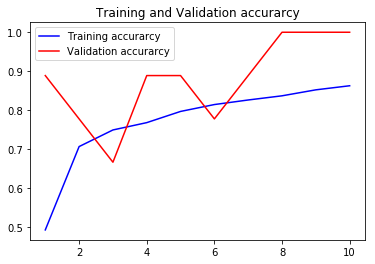

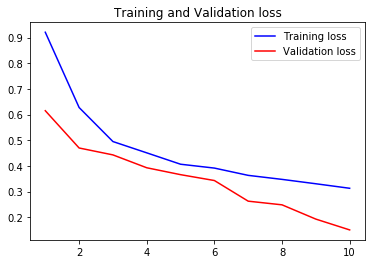

In [13]:
#lets plot the train and val curve
#get the details form the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [27]:
test_data = 'C:/Users/soumya/Python_Workspace/DEEP_LEARNING/RoomDetect(Btech_Final)/DataSet/TestImage/label2.8.jpg'
img = cv2.imread(test_data,cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (150,150))
cv2.imshow('image',img)
cv2.waitKey(0) & 0xFF
cv2.destroyAllWindows()

In [33]:
data = img.reshape(1 ,150,150,1)
model_out = model.predict([data])
    
if model_out[0,2] == 1:
        str_label = 'LABEL1' 
elif model_out[0,1] == 1:
        str_label = 'LABEL2'
else:
        str_label = 'LABEL3'


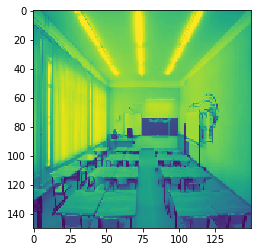

The image belongs to  LABEL2


In [34]:
imgplot=plt.imshow(img)
plt.show()
print('The image belongs to ',str_label)


In [30]:
model_out

array([[0., 1., 0.]], dtype=float32)